In [1]:
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from matplotlib import cm
plt.style.use('seaborn')

Define control dynamics

In [2]:
A = np.array([[1, -0.1],
              [0, 0.9]])
B = np.array([[1],[-1]])
bias = np.array([[0],[0]])
start = np.array([[10],[10]])
C = np.array([[0.2, 0.5],
                [0.4, 0.8]])

In [3]:
def step(curr_state, action):
    return np.dot(A, curr_state) + bias + np.dot(B, action) 

In [4]:
step(start, -1000)

array([[-991.],
       [1009.]])

Define cost function

In [5]:
def cost(state, action):
    return np.linalg.norm(action) + state.T.dot(C).dot(state)  

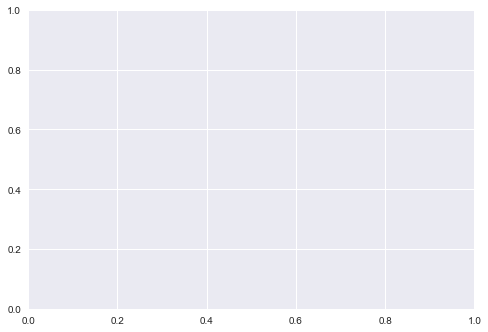

In [93]:
# plt.axis('equal')
# plt.xlim((0,10))
# plt.ylim((0,10))
ax = plt.gca()
ax.set_autoscale_on(False)
ax.scatter([-0.8,1.2,1,0.6,0.3], [8.2,6.2,8,6.8,7.1])

In [61]:
cost(start,0)

array([[190.]])

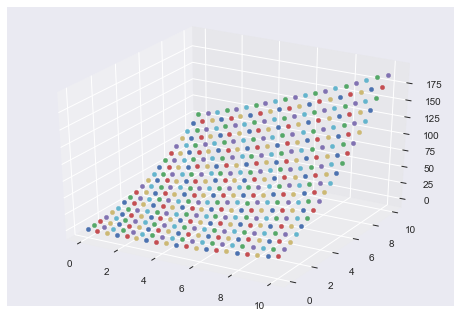

In [103]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x = np.linspace(0,10,20)
y = np.linspace(0,10,20)
for i in x:
    for j in y:
        ax.scatter(i, j, cost(np.array([i,j]),0))
plt.show()

In [99]:
x.shape

(100, 100)

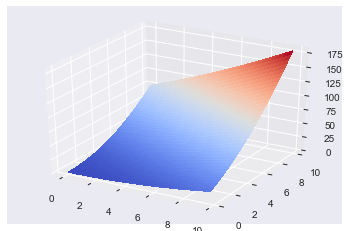

In [19]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
X = np.arange(0, 10, 0.25)
Y = np.arange(0, 10, 0.25)
X, Y = np.meshgrid(X, Y)
Z = np.array([[cost(np.array([i,j]), 0) for i,j in zip(a,b)] for a,b in zip(X,Y)])

ax.plot_surface(X, Y, Z, cmap=cm.coolwarm, linewidth=0, antialiased=False)
plt.show()